### PROJECT WORKFLOW
1. Dataset Familiarization
2. Data Cleaning
3. New Features Engineering
4. Exploratory Data Analysis (EDA)
5. Insights Generation with Panda:
    1. Which product category has generated the most revenue?
    2. Which product subcategories generate the most revenue?
    3. Which customer segment has the highest average order value?
    4. What is the average discount applied to high-value customers?
    5. Which geographic locations have the highest concentration of high-value customers?
    6. How does the discount rate impact the total sales across different product categories?
    7. Identify trends in purchase behavior over time (e.g., monthly)

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### 1. DATA FAMILIARIZATION and EXTRACTION

In [6]:
# Reading a csv file into a dataframe

df_grd = pd.read_csv(r'C:\Users\user\Desktop\10alytics\globex_retail_analytics\data\globex_retail_data.csv')

df_grd

,Customer_ID,Order_ID,Order_Date,Product_Category,Product_Sub_Category,Quantity,Price,Discount,Customer_Location,Revenue
0,CUST_013738,ORD_00102406,2023-01-01,Home & Garden,Gardening Tools,1,419.19,0.00,TN,419.1900
1,CUST_011726,ORD_00102902,2023-01-01,Electronics,Laptops,1,222.37,0.09,TN,202.3567
2,CUST_010891,ORD_00103864,2023-01-01,Electronics,Laptops,6,1107.65,0.00,IN,6645.9000
3,CUST_011452,ORD_00103560,2023-01-01,Electronics,Gaming Consoles,5,288.84,0.00,MA,1444.2000
4,CUST_010886,ORD_00100632,2023-01-02,Electronics,Headphones,1,191.27,0.00,AZ,191.2700
...,...,...,...,...,...,...,...,...,...,...
4995,CUST_014386,ORD_00104856,2024-12-31,Home & Garden,Furniture,1,196.62,0.00,MO,196.6200
4996,CUST_014231,ORD_00101362,2024-12-31,Beauty,Makeup,1,52.41,0.15,KY,44.5485
4997,CUST_014416,ORD_00101741,2024-12-31,Beauty,Skincare,1,138.98,0.08,MN,127.8616
4998,CUST_014307,ORD_00104277,2024-12-31,Home & Garden,Furniture,2,550.05,0.00,NJ,1100.1000


In [7]:
df_grd.head()

,Customer_ID,Order_ID,Order_Date,Product_Category,Product_Sub_Category,Quantity,Price,Discount,Customer_Location,Revenue
0,CUST_013738,ORD_00102406,2023-01-01,Home & Garden,Gardening Tools,1,419.19,0.00,TN,419.1900
1,CUST_011726,ORD_00102902,2023-01-01,Electronics,Laptops,1,222.37,0.09,TN,202.3567
2,CUST_010891,ORD_00103864,2023-01-01,Electronics,Laptops,6,1107.65,0.00,IN,6645.9000
3,CUST_011452,ORD_00103560,2023-01-01,Electronics,Gaming Consoles,5,288.84,0.00,MA,1444.2000
4,CUST_010886,ORD_00100632,2023-01-02,Electronics,Headphones,1,191.27,0.00,AZ,191.2700


In [8]:
# Checking the columns
df_grd.columns

Index(['Customer_ID', 'Order_ID', 'Order_Date', 'Product_Category',
       'Product_Sub_Category', 'Quantity', 'Price', 'Discount',
       'Customer_Location', 'Revenue'],
      dtype='object')

In [77]:
# Check the number of parameters missing
df_grd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   Customer_ID           5000 non-null   object  
 1   Order_ID              5000 non-null   object  
 2   Order_Date            5000 non-null   object  
 3   Product_Category      5000 non-null   object  
 4   Product_Sub_Category  5000 non-null   object  
 5   Quantity              5000 non-null   int64   
 6   Price                 5000 non-null   float64 
 7   Discount              5000 non-null   float64 
 8   Customer_Location     5000 non-null   object  
 9   Revenue               5000 non-null   float64 
 10  TotalPrice            5000 non-null   float64 
 11  Discount_Amount       5000 non-null   float64 
 12  Final_Revenue         5000 non-null   float64 
 13  Discount_Level        5000 non-null   category
dtypes: category(1), float64(6), int64(1), object(6)
memory u

### 2. DATA QUALITY ASSESSMENT CHECKS and CLEANING

In [40]:
# Checking for duplicate records
duplicates = df_grd.duplicated().sum()

if duplicates > 0:
    duplicated_rows = df_grd[df_grd.duplicated(keep=False)]
    print(duplicated_rows.head())
else:
    print('There is no duplicate records!')

There is no duplicate records!


In [41]:
# Remove duplicates
df = df_grd.drop_duplicates()

In [42]:
# Check and handle missing values 
print("Missing values per column:")
print(df.isnull().sum())

Missing values per column:
Customer_ID             0
Order_ID                0
Order_Date              0
Product_Category        0
Product_Sub_Category    0
Quantity                0
Price                   0
Discount                0
Customer_Location       0
Revenue                 0
TotalPrice              0
Discount_Amount         0
Final_Revenue           0
Discount_Level          0
dtype: int64


In [43]:
# Confirm types and shape
print(df.dtypes)
print(f"Cleaned dataset shape: {df.shape}")

Customer_ID               object
Order_ID                  object
Order_Date                object
Product_Category          object
Product_Sub_Category      object
Quantity                   int64
Price                    float64
Discount                 float64
Customer_Location         object
Revenue                  float64
TotalPrice               float64
Discount_Amount          float64
Final_Revenue            float64
Discount_Level          category
dtype: object
Cleaned dataset shape: (5000, 14)


In [ ]:
# Checking for inconsistence values
# Check for missing or zero/negative revenue
if df['Revenue'].isnull().any() or (df['Revenue'] <= 0).any():
    print("There are inconsistent values in 'Revenue' column.")
else:
    print("No inconsistent values found in 'Revenue'.")

No inconsistent values found in 'Revenue'.


In [45]:
# Ensure correct data types
df['Order_Date'] = pd.to_datetime(df['Order_Date'])
df['Order_Date']

0      2023-01-01
1      2023-01-01
2      2023-01-01
3      2023-01-01
4      2023-01-02
          ...    
4995   2024-12-31
4996   2024-12-31
4997   2024-12-31
4998   2024-12-31
4999   2024-12-31
Name: Order_Date, Length: 5000, dtype: datetime64[ns]

In [46]:
# Save the processed data to a new CSV file
df.to_csv("cleaned_sales_data.csv", index=False)
print("Processed data saved as 'cleaned_sales_data.csv'")

Processed data saved as 'cleaned_sales_data.csv'


### 3. NEW FEATURES ENGINEERING

In [47]:
# 1. Total Price Before Discount
df["TotalPrice"] = df["Quantity"] * df["Price"]

df["TotalPrice"]

0        419.19
1        222.37
2       6645.90
3       1444.20
4        191.27
         ...   
4995     196.62
4996      52.41
4997     138.98
4998    1100.10
4999     117.70
Name: TotalPrice, Length: 5000, dtype: float64

In [48]:
# 2. Discounted Amount
df["Discount_Amount"] = df["TotalPrice"] * df["Discount"]

df["Discount_Amount"]

0        0.0000
1       20.0133
2        0.0000
3        0.0000
4        0.0000
         ...   
4995     0.0000
4996     7.8615
4997    11.1184
4998     0.0000
4999    16.4780
Name: Discount_Amount, Length: 5000, dtype: float64

In [49]:
# 3. Final Revenue (in case Revenue column has issues)
# Useful incase the Original 'Revenue' column has missing or incorrect values
# Useful for cross-checking
df["Final_Revenue"] = df["TotalPrice"] - df["Discount_Amount"]

df["Final_Revenue"]

0        419.1900
1        202.3567
2       6645.9000
3       1444.2000
4        191.2700
          ...    
4995     196.6200
4996      44.5485
4997     127.8616
4998    1100.1000
4999     101.2220
Name: Final_Revenue, Length: 5000, dtype: float64

In [51]:
# 4. Discount Category (low, medium, high)
df["Discount_Level"] = pd.cut(df["Discount"], bins=[-0.01, 0.05, 0.15, 1.0],
                              labels=["Low", "Medium", "High"])

df["Discount_Level"]

0          Low
1       Medium
2          Low
3          Low
4          Low
         ...  
4995       Low
4996    Medium
4997    Medium
4998       Low
4999    Medium
Name: Discount_Level, Length: 5000, dtype: category
Categories (3, object): ['Low' < 'Medium' < 'High']

In [66]:
# 5. Month and Day Features
df["Month"] = df["Order_Date"].dt.month_name()
df["Day_of_Week"] = df["Order_Date"].dt.day_name()

In [37]:
# 6. High-Value Customer Flag at threshold 1000
df["High_Value_Customer"] = df["Final_Revenue"] > 1000  

df["High_Value_Customer"]

0       False
1       False
2        True
3        True
4       False
        ...  
4995    False
4996    False
4997    False
4998     True
4999    False
Name: High_Value_Customer, Length: 5000, dtype: bool

In [57]:
df.head()

,Customer_ID,Order_ID,Order_Date,Product_Category,Product_Sub_Category,Quantity,Price,Discount,Customer_Location,Revenue,TotalPrice,Discount_Amount,Final_Revenue,Discount_Level,Month,Day_of_Week
0,CUST_013738,ORD_00102406,2023-01-01,Home & Garden,Gardening Tools,1,419.19,0.00,TN,419.1900,419.19,0.0000,419.1900,Low,January,Sunday
1,CUST_011726,ORD_00102902,2023-01-01,Electronics,Laptops,1,222.37,0.09,TN,202.3567,222.37,20.0133,202.3567,Medium,January,Sunday
2,CUST_010891,ORD_00103864,2023-01-01,Electronics,Laptops,6,1107.65,0.00,IN,6645.9000,6645.90,0.0000,6645.9000,Low,January,Sunday
3,CUST_011452,ORD_00103560,2023-01-01,Electronics,Gaming Consoles,5,288.84,0.00,MA,1444.2000,1444.20,0.0000,1444.2000,Low,January,Sunday
4,CUST_010886,ORD_00100632,2023-01-02,Electronics,Headphones,1,191.27,0.00,AZ,191.2700,191.27,0.0000,191.2700,Low,January,Monday


### 4. Exploratory Data Analysis (EDA)

In [61]:
print(df.info())
print(f"dataset shape: {df.shape}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Customer_ID           5000 non-null   object        
 1   Order_ID              5000 non-null   object        
 2   Order_Date            5000 non-null   datetime64[ns]
 3   Product_Category      5000 non-null   object        
 4   Product_Sub_Category  5000 non-null   object        
 5   Quantity              5000 non-null   int64         
 6   Price                 5000 non-null   float64       
 7   Discount              5000 non-null   float64       
 8   Customer_Location     5000 non-null   object        
 9   Revenue               5000 non-null   float64       
 10  TotalPrice            5000 non-null   float64       
 11  Discount_Amount       5000 non-null   float64       
 12  Final_Revenue         5000 non-null   float64       
 13  Discount_Level    

In [ ]:
print(df.describe())

          Quantity        Price     Discount       Revenue    TotalPrice  \
count  5000.000000  5000.000000  5000.000000   5000.000000   5000.000000   
mean      2.368800   330.240118     0.063534    743.955115    791.507812   
std       1.704631   427.081790     0.118311   1328.413944   1390.262541   
min       1.000000     8.000000     0.000000      6.164400      8.010000   
25%       1.000000    54.017500     0.000000     94.601000    104.297500   
50%       2.000000   149.770000     0.000000    264.530250    287.740000   
75%       3.000000   415.087500     0.090000    767.867500    826.407500   
max      10.000000  1997.860000     0.500000  13819.840000  13971.150000   

       Discount_Amount  Final_Revenue  
count      5000.000000    5000.000000  
mean         47.552697     743.955115  
std         194.640992    1328.413944  
min           0.000000       6.164400  
25%           0.000000      94.601000  
50%           0.000000     264.530250  
75%          11.961850     767.8675

In [ ]:
# Count of unique values
print(df.nunique())

Customer_ID             3203
Order_ID                5000
Order_Date               730
Product_Category           6
Product_Sub_Category      36
Quantity                  10
Price                   4743
Discount                  47
Customer_Location         30
Revenue                 4915
TotalPrice              4845
Discount_Amount         1543
Final_Revenue           4921
Discount_Level             3
dtype: int64


In [64]:
# Top categories
print(df_grd["Product_Category"].value_counts())
print(df_grd["Customer_Location"].value_counts())

Product_Category
Electronics      882
Books            871
Clothing         832
Sports           826
Beauty           821
Home & Garden    768
Name: count, dtype: int64
Customer_Location
IL    191
LA    189
MD    188
MI    186
CO    186
AZ    179
AL    179
WI    177
NJ    177
WA    176
MA    175
MO    173
PA    170
OH    169
FL    163
VA    163
SC    163
MN    162
KY    162
GA    161
OR    161
CT    160
NY    159
OK    155
NC    154
TX    150
CA    150
UT    144
TN    141
IN    137
Name: count, dtype: int64


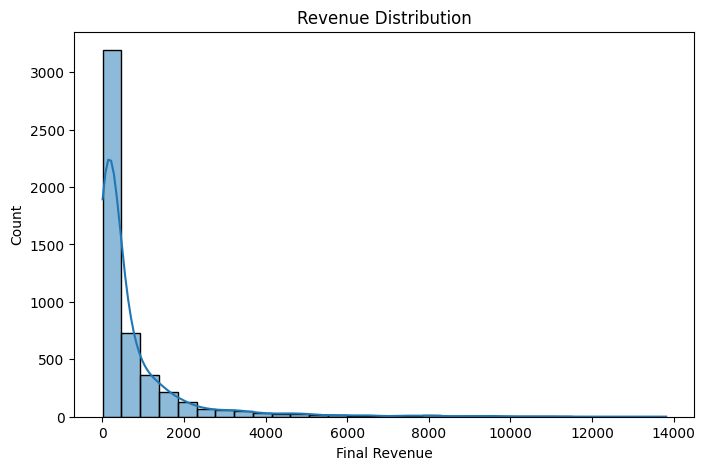

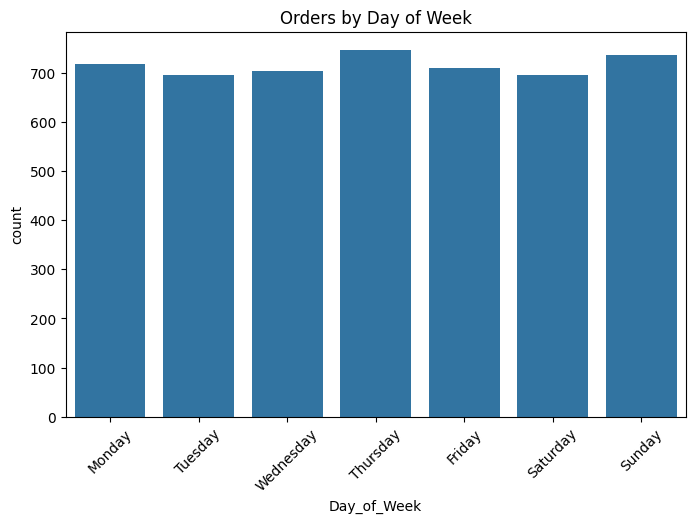

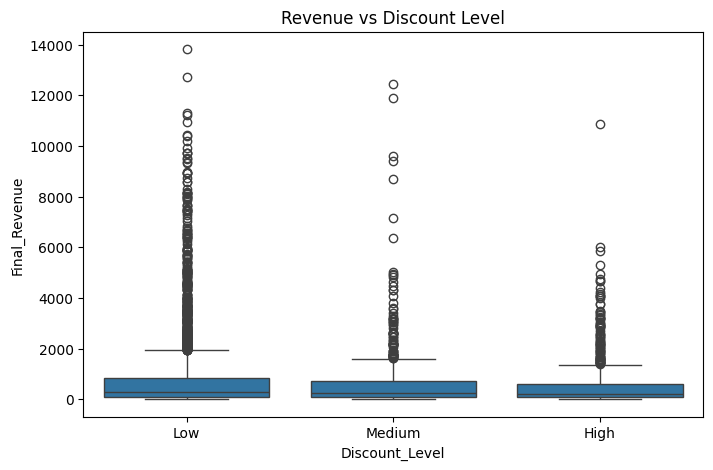

In [82]:
# VISUAL EDA
# 1. Revenue distribution
plt.figure(figsize=(8, 5))
sns.histplot(df["Final_Revenue"], bins=30, kde=True)
plt.title("Revenue Distribution")
plt.xlabel("Final Revenue")
plt.show()

# 2. Orders by Day of Week
plt.figure(figsize=(8, 5))
sns.countplot(x="Day_of_Week", data=df, order=[
              "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"])
plt.title("Orders by Day of Week")
plt.xticks(rotation=45)
plt.show()

# 3. Discount level vs Revenue
plt.figure(figsize=(8, 5))
sns.boxplot(x="Discount_Level", y="Final_Revenue", data=df)
plt.title("Revenue vs Discount Level")
plt.show()


### 5. INSIGHTS GENERATION WITH PANDAS
1. Which product category has generated the most revenue?
2. Which product subcategories generate the most revenue?
3. Which customer segment has the highest average order value?
4. What is the average discount applied to high-value customers?
5. Which geographic locations have the highest concentration of high-value customers?
6. How does the discount rate impact the total sales across different product categories?
7. Identify trends in purchase behavior over time (e.g., monthly)

In [ ]:
# 1. Which product category has generated the most revenue?

df.groupby("Product_Category")["Revenue"].sum().sort_values(ascending=False)

Product_Category
Electronics      2.079574e+06
Home & Garden    6.814707e+05
Sports           4.744529e+05
Clothing         2.819485e+05
Beauty           1.371077e+05
Books            6.522193e+04
Name: Revenue, dtype: float64

In [ ]:
# 2. Which product subcategories generate the most revenue?

df.groupby("Product_Sub_Category")["Revenue"].sum().sort_values(ascending=False)

Product_Sub_Category
Smart Watches         403335.4208
Smartphones           365802.8764
Tablets               348740.8234
Gaming Consoles       332296.2353
Headphones            318398.7129
Laptops               310999.7473
Gardening Tools       129829.3451
Kitchen Appliances    125048.8293
Storage               110330.1389
Home Decor            109826.6465
Bedding               104745.4457
Furniture             101690.3165
Fitness Equipment      89386.9424
Winter Sports          85401.0424
Water Sports           82157.8339
Cycling                74612.5020
Outdoor Gear           71642.8698
Team Sports            71251.6909
Sportswear             50478.1730
Accessories            49027.4725
Jeans                  47992.4545
Shoes                  46340.9219
Mens Shirts            46028.2462
Womens Dresses         42081.2178
Beauty Tools           26142.8019
Skincare               24689.3550
Fragrances             24394.3354
Personal Care          21010.3177
Makeup                 2046

In [73]:
# 3. Which customer segment has the highest average order value?

order_totals = df.groupby("Order_ID")["Revenue"].sum().reset_index()
customer_orders = df[["Order_ID", "Customer_ID"]].drop_duplicates()
avg_order = order_totals.merge(customer_orders, on="Order_ID")
avg_order.groupby("Customer_ID")["Revenue"].mean().sort_values(ascending=False)

Customer_ID
CUST_011802    13819.8400
CUST_013998    12708.0100
CUST_012208    11895.9820
CUST_014549    10387.2000
CUST_011076    10201.0500
                  ...    
CUST_011755        8.7600
CUST_010033        8.7300
CUST_010621        8.4235
CUST_011863        7.5768
CUST_011849        6.7592
Name: Revenue, Length: 3203, dtype: float64

In [75]:
# 4. What is the average discount applied to high-value customers?
# Assume high-value = customer with total spent > 1000

customer_spend = df.groupby("Customer_ID")["Revenue"].sum()
high_value_cust = customer_spend[customer_spend > 1000].index
df[df["Customer_ID"].isin(high_value_cust)]["Discount"].mean()


np.float64(0.056473659231134316)

In [78]:
# 5. Which geographic locations have the highest concentration of high-value customers?

high_value_df = df[df["Customer_ID"].isin(high_value_cust)]
high_value_df.groupby("Customer_Location")["Customer_ID"].nunique().sort_values(ascending=False)

Customer_Location
NJ    90
CO    85
LA    80
IL    80
NC    78
AL    77
WA    74
MN    74
MD    73
WI    73
MA    72
MI    71
PA    70
AZ    69
UT    67
CT    67
SC    67
MO    67
FL    67
NY    66
OH    65
OR    65
VA    64
GA    63
TX    60
OK    60
CA    58
KY    58
IN    57
TN    49
Name: Customer_ID, dtype: int64

In [79]:
# 6. How does the discount rate impact the total sales across different product categories?

disc_rate_impact = df_grd.groupby(["Product_Category", "Discount"])["Revenue"].sum().unstack() #.fillna(0)

disc_rate_impact


Discount,0.00,0.05,0.06,0.07,0.08,0.09,0.10,0.11,0.12,0.13,...,0.41,0.42,0.43,0.44,0.45,0.46,0.47,0.48,0.49,0.50
Product_Category,,,,,,,,,,,,,,,,,,,,,
Beauty,100612.27,1437.7395,2868.0622,1138.3851,2240.2920,2591.5617,1573.686,2592.4988,1415.5592,2102.9205,...,374.4966,514.1526,155.6784,392.2240,324.5935,115.8516,516.2677,392.9640,265.3632,365.570
Books,47592.15,241.3190,757.3674,792.1275,824.7340,1592.4727,363.114,1029.9703,1323.8192,990.5472,...,44.1320,97.3994,113.4300,183.7864,260.5295,350.5518,127.5180,129.9636,55.8348,125.050
Clothing,206131.56,3676.4240,1930.1584,5263.2978,2211.0820,6857.4961,2550.600,3367.0658,3919.3088,2169.6582,...,684.6773,928.3596,206.6763,189.4368,156.2715,181.3914,315.1380,1357.1844,472.8210,267.870
Electronics,1602712.04,4906.4080,34192.1804,23190.1173,12589.2708,36512.7126,23075.118,30561.3807,19894.9344,21090.7662,...,8581.2432,8181.2828,2506.3413,320.1016,4003.8185,6352.0686,10859.3343,4667.1144,2397.2244,379.125
Home & Garden,500935.12,4446.0760,13582.2480,5155.3527,8532.6136,8574.8481,7969.077,9014.4006,4989.3888,7419.6123,...,3231.1881,2597.5996,347.0445,1131.8608,1528.2905,1232.6580,1123.9710,1805.4660,1371.1554,241.040
Sports,335757.95,1315.8355,11374.8742,7755.9303,7646.3776,3143.7042,3794.121,8126.8926,6158.6536,8704.8807,...,1845.6085,1058.6914,891.2463,1141.3416,291.4505,2212.0668,844.3960,561.2932,50.1840,401.200


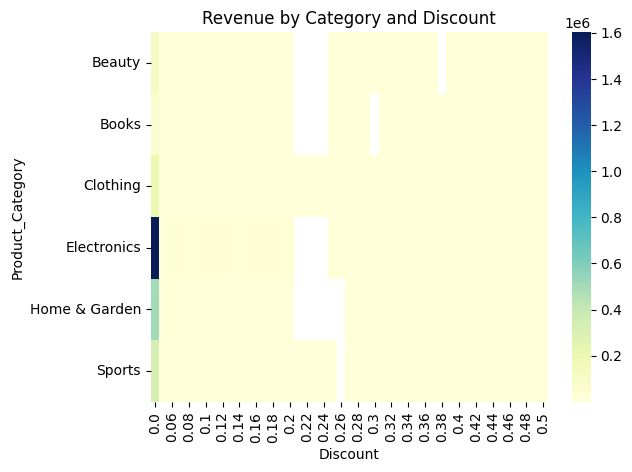

In [83]:
sns.heatmap(disc_rate_impact, cmap="YlGnBu")
plt.title("Revenue by Category and Discount")
plt.show()

In [84]:
# 7. Identify trends in purchase behavior over time (e.g., monthly)

df_grd["Order_Date"] = pd.to_datetime(df_grd["Order_Date"])
df_grd["Month"] = df_grd["Order_Date"].dt.to_period("M")
monthly_trend = df_grd.groupby("Month")["Revenue"].sum()

monthly_trend

Month
2023-01    177437.6013
2023-02    173608.8882
2023-03    151549.1629
2023-04    160107.8262
2023-05    167926.8782
2023-06    134903.8958
2023-07    202245.1529
2023-08    102365.7004
2023-09    153440.8570
2023-10    160409.8015
2023-11    137063.2309
2023-12    154119.1079
2024-01    187767.1758
2024-02    185474.4577
2024-03    156389.5161
2024-04    133587.1201
2024-05    164528.5586
2024-06    140662.3017
2024-07    165830.4983
2024-08    130879.2232
2024-09    147267.8345
2024-10    133072.4755
2024-11    153979.2064
2024-12    145159.1055
Freq: M, Name: Revenue, dtype: float64

<Axes: title={'center': 'Monthly Revenue Trend'}, xlabel='Month', ylabel='Revenue'>

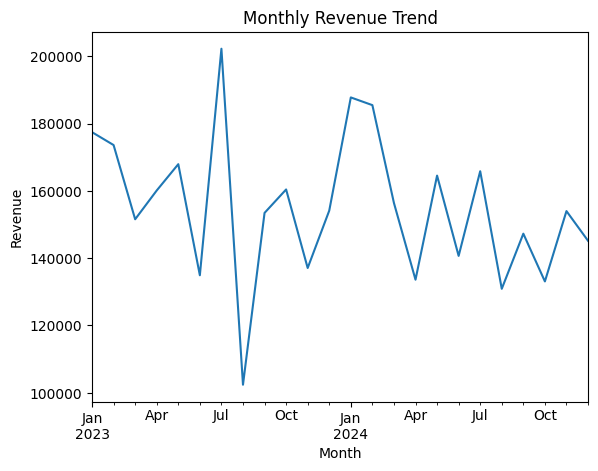

In [85]:
monthly_trend.plot(kind="line", title="Monthly Revenue Trend", ylabel="Revenue", xlabel="Month")